In [ ]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization,Input


depth = 10
filters = 64
model = Sequential()
#Adding layers

model.add(Conv2D(filters ,kernel_size=(3,3), activation='relu',padding = 'same', input_shape = (256,150,1)))

for i in range(depth-2):
    model.add(Conv2D(filters, kernel_size=(3,3), activation='relu',padding = 'same'))
    model.add(BatchNormalization())
    
model.add(Conv2D(1, kernel_size=(3,3), padding = 'same'))
model.summary()

W0212 15:19:34.746931  8516 deprecation_wrapper.py:119] From C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0212 15:19:34.794613  8516 deprecation_wrapper.py:119] From C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0212 15:19:34.807578  8516 deprecation_wrapper.py:119] From C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0212 15:19:34.920162  8516 deprecation_wrapper.py:119] From C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instea

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 150, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 150, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 150, 64)      256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 150, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 150, 64)      256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 150, 64)      36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256, 150, 64)      256       
__________

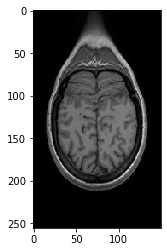

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
img = nib.load('IXI002-Guys-0828-MPRAGESEN_-s256_-0301-00003-000001-01.nii')
epi = img.get_fdata()
slice_A = epi[200,:,:]
fig, ax = plt.subplots()
ax.imshow(slice_A, cmap="gray")
plt.show()

In [4]:
import random
import numpy as np
def add_rician_noise_to_img(noise_percent,img):
    random_factor = noise_percent * np.random.normal(loc=0., scale=1., size=img.shape)
    noise_image_real = img + random_factor
    noise_image_img = random_factor
    noise_image_real = np.square(noise_image_real) 
    noise_image_img = np.square(noise_image_img) 
    rician_noise_square =  noise_image_img + noise_image_real
    rician_noise_image = np.sqrt(rician_noise_square)
    return rician_noise_image

In [5]:
slice_A_with_noise = add_rician_noise_to_img(0.2,slice_A)
slice_A_with_noise.dtype

dtype('float64')

In [6]:
slice_A_with_noise

array([[0.10375676, 0.241613  , 0.29644565, ..., 0.13110466, 0.435485  ,
        0.35210276],
       [0.04746612, 0.28281993, 0.18753515, ..., 0.36743775, 0.28477797,
        0.03139438],
       [1.02214083, 0.1973458 , 0.4601422 , ..., 0.00315411, 0.09965481,
        0.09355271],
       ...,
       [0.25278331, 0.08837642, 0.71075563, ..., 0.34472565, 0.45009769,
        0.03877452],
       [0.03026808, 0.38926497, 0.14365861, ..., 0.28878737, 0.19052228,
        0.24256436],
       [0.07747973, 0.15894971, 0.05970456, ..., 0.03019087, 0.36753617,
        0.2384678 ]])

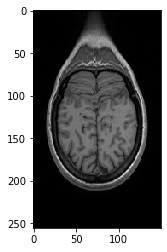

In [7]:
fig, ax = plt.subplots()
ax.imshow(slice_A_with_noise, cmap="gray")
plt.show()

In [8]:
residual_noise = slice_A_with_noise - slice_A

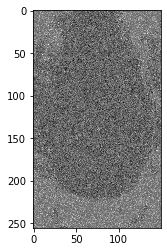

In [9]:
fig, ax = plt.subplots()
ax.imshow(residual_noise, cmap="gray")
plt.show()

In [27]:
import keras.backend as K
def average_mean_squared_error(y_true,y_pred):
    result = 0
    for j in range(256):
        for k  in range(150):
            res = (y_true[j,k,1] - y_pred[j,k,1])
            res = res * res
            result = result + res
    return (math.sqrt(result)/1006)

In [32]:
def l2_loss(y_pred,y_true):
    return K.sqrt(K.sum(K.square(y_pred-y_true))/1006)

In [12]:
import os
os.chdir('D:/beproj/dataset/nusta_noise')

In [13]:
import numpy as np
import glob
Y_train = np.zeros((581,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("D:/beproj/dataset/nusta_noise/*.nii")
i = 0
for f_name in txt_files:
    b = np.loadtxt(f_name ,delimiter=',')
    if b.shape == (256,150):
        Y_train[i] = b
        i = i + 1

In [14]:
i

503

In [15]:
Y_train = Y_train[:503,:,:]

In [16]:
Y_train.shape

(503, 256, 150)

In [17]:
import os
os.chdir('D:/beproj/dataset/image_with_noise/')

In [18]:
import numpy as np
import glob
X_train = np.zeros((581,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("D:/beproj/dataset/image_with_noise/*.nii")
i = 0
for f_name in txt_files:
    b = np.loadtxt(f_name ,delimiter=',')
    if b.shape == (256,150):
        X_train[i] = b
        i = i + 1

In [19]:
i

503

In [20]:
X_train = X_train[:503,:,:]
X_train.shape

(503, 256, 150)

In [21]:
X_train.shape[1:]

(256, 150)

In [22]:
import keras.backend as K

def noise_accuracy(y_true, y_pred):
    return K.mean(y_pred)

In [33]:
from keras import optimizers
opt = optimizers.SGD(lr=0.001, momentum=0.8, clipnorm=1.0 ,clipvalue =0.5)
model.compile(optimizer = opt, loss= l2_loss, metrics=["accuracy"])

In [34]:
model.fit(X_train[:30,:,:].reshape(-1,256,150,1),Y_train[:30,:,:].reshape(-1,256,150,1),epochs=50 ,batch_size=10)

Epoch 1/50
30/30 [==============================] - 40s 1s/step - loss: 5.7090 - acc: 0.0000e+00
Epoch 2/50
30/30 [==============================] - 2s 76ms/step - loss: 5.7435 - acc: 0.0000e+00
Epoch 3/50
30/30 [==============================] - 2s 76ms/step - loss: 5.6445 - acc: 0.0000e+00
Epoch 4/50
30/30 [==============================] - 2s 76ms/step - loss: 5.5595 - acc: 0.0000e+00
Epoch 5/50
30/30 [==============================] - 2s 76ms/step - loss: 5.4800 - acc: 0.0000e+00
Epoch 6/50
30/30 [==============================] - 2s 76ms/step - loss: 5.4403 - acc: 0.0000e+00
Epoch 7/50
30/30 [==============================] - 2s 76ms/step - loss: 5.4412 - acc: 0.0000e+00
Epoch 8/50
30/30 [==============================] - 2s 76ms/step - loss: 5.3328 - acc: 0.0000e+00
Epoch 9/50
30/30 [==============================] - 2s 76ms/step - loss: 5.3690 - acc: 0.0000e+00
Epoch 10/50
30/30 [==============================] - 2s 76ms/step - loss: 5.3453 - acc: 0.0000e+00
Epoch 11/50
30/30 [=

In [35]:
resi = model.predict(np.array(slice_A_with_noise).reshape(-1,256,150,1))
resi.shape

(1, 256, 150, 1)

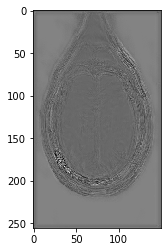

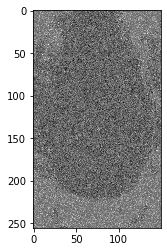

In [36]:
fig, ax = plt.subplots()
ax.imshow(resi.reshape(256,150), cmap="gray")
plt.show()
fig, ax = plt.subplots()
ax.imshow(residual_noise, cmap="gray")
plt.show()

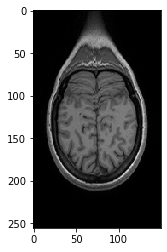

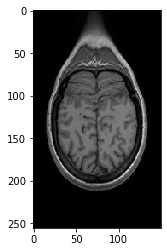

In [38]:
res1 = slice_A_with_noise - resi.reshape(256,150)
fig, ax = plt.subplots()
ax.imshow(res1, cmap="gray")
plt.show()
res1 = slice_A_with_noise - resi.reshape(256,150)
fig, ax = plt.subplots()
ax.imshow(slice_A, cmap="gray")
plt.show()